In [74]:
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

data=pd.read_csv(r'C:\Users\Nippun Sharma\Downloads\Salary_Data.csv')

In [88]:
class linear_model:
    def __init__(self,learning_rate=0.01, l2_reg=0, n_iter=1000):
        self.lr=learning_rate
        self.l2_reg=l2_reg
        self.n_iter=n_iter
        self.w=None
        self.b=None
        
    def fit(self,X,y,l2_reg=0,n_iter=1000,learning_rate=0.01,verbose=0):
        
        self.l2_reg=l2_reg
        self.n_iter=n_iter
        self.lr=learning_rate
        
        if(len(X.shape)==1):
            n_samples=X.shape
            n_features=1
        else:
            n_samples,n_features=X.shape
        self.w=np.zeros((n_features,1))
        self.b=0
        
        print('Starting -- learning_rate:',self.lr,',iterations:',self.n_iter,',L2_regularization:',self.l2_reg,'\n')
        for _ in range(self.n_iter):
            s1=0
            s2=0
            for idx,x_i in enumerate(X):
                s1+=(np.dot(self.w.T,x_i)+self.b)*x_i - y[idx]*x_i
                s2+=(np.dot(self.w.T,x_i)+self.b - y[idx])
            if(verbose!=0):
                print('Iteration number :',_)
                if((_)%10==0):
                    print('w=',self.w,'b=',self.b,'\n')
            self.w-=self.lr*(self.w*self.l2_reg + 2*s1/n_samples)
            self.b-=self.lr*(2*s2/n_samples)
            
    def predict(self,X):
        predicts=[]
        for idx,x_i in enumerate(X):
            predicts.append(np.dot(self.w.T,x_i)+self.b)
        return predicts
    
    def find_loss(self,X,y):
        predicts=self.predict(X)
        y=np.array(y)
        predicts=np.array(predicts)
        return ((predicts-y)**2).mean()

In [109]:
X=data['YearsExperience']
y=data['Salary']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

X_train,X_test,y_train,y_test=np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)

model=linear_model()
model.fit(X_train,y_train,verbose=0,l2_reg=0)

Starting -- learning_rate: 0.01 ,iterations: 1000 ,L2_regularization: 0 



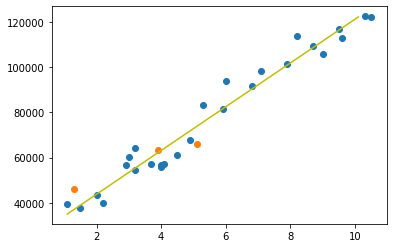

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(min(X_train),max(X_train),1)

plt.scatter(X_train,y_train)
plt.plot(x,model.w[0][0]*x+model.b[0][0], color='y')
plt.scatter(X_test,y_test)
plt.show()

In [111]:
print(model.predict(X_test))
print(model.find_loss(X_test,y_test))
print(y_test)

[array([[73791.27050236]]), array([[37095.94898157]]), array([[62203.27423263]])]
311901959.8056772
[66029. 46205. 63218.]


In [112]:
print(model.predict([6.4,0.2,12.7]))

[array([[86344.93312789]]), array([[26473.61906765]]), array([[147181.91354394]])]
